<a href="https://colab.research.google.com/github/Krzesimir13/Data-Science/blob/main/121_130_exercises_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'1.18.2'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [ ]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [ ]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-23,1265.74,1288.15,1260.5301,1271.17,1710122
2020-04-22,1241.11,1279.88,1237.2000,1258.41,2315792
2020-04-21,1242.71,1250.00,1205.0000,1212.16,2482404
2020-04-20,1269.89,1276.82,1256.4400,1261.15,1764608
2020-04-17,1281.70,1290.00,1266.0000,1279.00,2552824
...,...,...,...,...,...
2015-05-01,549.92,551.22,543.8500,551.16,1828500
2015-04-30,558.56,561.11,546.7200,548.77,2362000
2015-04-29,560.51,565.84,559.0000,561.39,1681000


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-04-23 to 2015-04-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [ ]:
google.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,975.417606,984.166155,966.272443,975.606747,1.794686e+06
std,224.714166,227.174062,222.569892,225.118960,9.472449e+05
min,535.900000,542.960000,532.230000,535.080000,5.211410e+05
25%,778.400000,783.050000,770.453500,777.212500,1.220973e+06
50%,1004.490000,1011.770000,995.630000,1005.125000,1.553164e+06
75%,1149.532500,1159.465000,1137.915000,1150.790000,2.059121e+06
max,1527.200000,1530.740000,1520.980000,1524.870000,1.285810e+07


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [ ]:
pd.set_option('precision', 2)
google.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1.26e+03
mean,975.42,984.17,966.27,975.61,1.79e+06
std,224.71,227.17,222.57,225.12,9.47e+05
min,535.90,542.96,532.23,535.08,5.21e+05
25%,778.40,783.05,770.45,777.21,1.22e+06
50%,1004.49,1011.77,995.63,1005.12,1.55e+06
75%,1149.53,1159.46,1137.91,1150.79,2.06e+06
max,1527.20,1530.74,1520.98,1524.87,1.29e+07


__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1258.00
mean,975.42,984.17,966.27,975.61,1794686.24
std,224.71,227.17,222.57,225.12,947244.93
min,535.90,542.96,532.23,535.08,521141.00
25%,778.40,783.05,770.45,777.21,1220973.25
50%,1004.49,1011.77,995.63,1005.12,1553164.00
75%,1149.53,1159.46,1137.91,1150.79,2059121.25
max,1527.20,1530.74,1520.98,1524.87,12858100.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

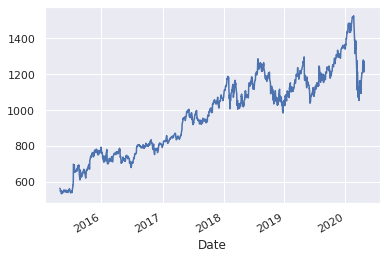

In [ ]:
google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [ ]:
google = google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2020-04-23,1265.74,1288.15,1260.53,1271.17,1710122
1,2020-04-22,1241.11,1279.88,1237.20,1258.41,2315792
2,2020-04-21,1242.71,1250.00,1205.00,1212.16,2482404
3,2020-04-20,1269.89,1276.82,1256.44,1261.15,1764608
4,2020-04-17,1281.70,1290.00,1266.00,1279.00,2552824
...,...,...,...,...,...,...
1253,2015-05-01,549.92,551.22,543.85,551.16,1828500
1254,2015-04-30,558.56,561.11,546.72,548.77,2362000
1255,2015-04-29,560.51,565.84,559.00,561.39,1681000
1256,2015-04-28,564.32,567.83,560.96,564.37,1859787


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [ ]:
google['Year'] = google['Date'].dt.year
google['Month'] = google['Date'].dt.month
google

,Date,Open,High,Low,Close,Volume,Year,Month
0,2020-04-23,1265.74,1288.15,1260.53,1271.17,1710122,2020,4
1,2020-04-22,1241.11,1279.88,1237.20,1258.41,2315792,2020,4
2,2020-04-21,1242.71,1250.00,1205.00,1212.16,2482404,2020,4
3,2020-04-20,1269.89,1276.82,1256.44,1261.15,1764608,2020,4
4,2020-04-17,1281.70,1290.00,1266.00,1279.00,2552824,2020,4
...,...,...,...,...,...,...,...,...
1253,2015-05-01,549.92,551.22,543.85,551.16,1828500,2015,5
1254,2015-04-30,558.56,561.11,546.72,548.77,2362000,2015,4
1255,2015-04-29,560.51,565.84,559.00,561.39,1681000,2015,4
1256,2015-04-28,564.32,567.83,560.96,564.37,1859787,2015,4


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [ ]:
google.groupby('Year')['Close'].mean()

Year
2015    654.54
2016    763.21
2017    939.77
2018   1122.05
2019   1191.22
2020   1325.52
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

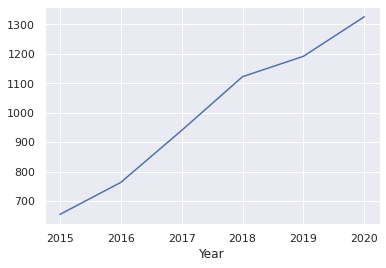

In [ ]:
google.groupby('Year')['Close'].mean().plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [ ]:
google.groupby('Month')['Close'].mean()

Month
1    1052.83
2    1044.11
3    1008.99
4     995.68
5     901.25
6     889.34
7     935.87
8     969.14
9     953.44
10    976.73
11    991.32
12    999.30
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

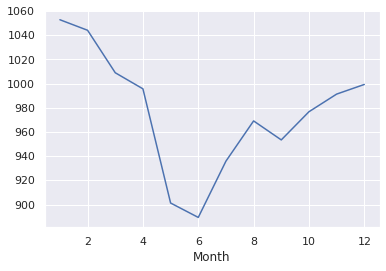

In [ ]:
google.groupby('Month')['Close'].mean().plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [ ]:
google.groupby(['Year', 'Month'])['Close'].mean()

Year  Month
2015  4        560.16
      5        547.68
      6        550.80
      7        617.47
      8        667.66
                ...  
2019  12      1340.99
2020  1       1436.17
      2       1462.85
      3       1185.14
      4       1210.21
Name: Close, Length: 61, dtype: float64

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [ ]:
google['Close'].argmax()

45

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [ ]:
google.iloc[[google['Close'].argmax()]]

,Date,Open,High,Low,Close,Volume,Year,Month
45,2020-02-19,1527.20,1530.74,1520.98,1524.87,1137338,2020,2


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [ ]:
google[['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2020-04-23,1265.74,1271.17,1710122
1,2020-04-22,1241.11,1258.41,2315792
2,2020-04-21,1242.71,1212.16,2482404
3,2020-04-20,1269.89,1261.15,1764608
4,2020-04-17,1281.70,1279.00,2552824
...,...,...,...,...
1253,2015-05-01,549.92,551.16,1828500
1254,2015-04-30,558.56,548.77,2362000
1255,2015-04-29,560.51,561.39,1681000
1256,2015-04-28,564.32,564.37,1859787


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [ ]:
google = google.set_index('Date')
google

,Open,High,Low,Close,Volume,Year,Month
Date,,,,,,,
2020-04-23,1265.74,1288.15,1260.53,1271.17,1710122,2020,4
2020-04-22,1241.11,1279.88,1237.20,1258.41,2315792,2020,4
2020-04-21,1242.71,1250.00,1205.00,1212.16,2482404,2020,4
2020-04-20,1269.89,1276.82,1256.44,1261.15,1764608,2020,4
2020-04-17,1281.70,1290.00,1266.00,1279.00,2552824,2020,4
...,...,...,...,...,...,...,...
2015-05-01,549.92,551.22,543.85,551.16,1828500,2015,5
2015-04-30,558.56,561.11,546.72,548.77,2362000,2015,4
2015-04-29,560.51,565.84,559.00,561.39,1681000,2015,4


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [ ]:
google = google.drop(columns=['Year', 'Month'])
google

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-23,1265.74,1288.15,1260.53,1271.17,1710122
2020-04-22,1241.11,1279.88,1237.20,1258.41,2315792
2020-04-21,1242.71,1250.00,1205.00,1212.16,2482404
2020-04-20,1269.89,1276.82,1256.44,1261.15,1764608
2020-04-17,1281.70,1290.00,1266.00,1279.00,2552824
...,...,...,...,...,...
2015-05-01,549.92,551.22,543.85,551.16,1828500
2015-04-30,558.56,561.11,546.72,548.77,2362000
2015-04-29,560.51,565.84,559.00,561.39,1681000


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [ ]:
google.columns = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2020-04-23,1265.74,1288.15,1260.53,1271.17,1710122
2020-04-22,1241.11,1279.88,1237.20,1258.41,2315792
2020-04-21,1242.71,1250.00,1205.00,1212.16,2482404
2020-04-20,1269.89,1276.82,1256.44,1261.15,1764608
2020-04-17,1281.70,1290.00,1266.00,1279.00,2552824
...,...,...,...,...,...
2015-05-01,549.92,551.22,543.85,551.16,1828500
2015-04-30,558.56,561.11,546.72,548.77,2362000
2015-04-29,560.51,565.84,559.00,561.39,1681000
